# Reading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from scipy.stats import ttest_ind #Independent Sample T-test
from scipy.stats import f_oneway #One-Way ANOVA
from scipy.stats import levene

# Reading Data

In [2]:
wine_df=pd.read_excel('Wine.xlsx',sheet_name='Transactions')

# Data Preparation and Cleaning

In [3]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 10 columns):
Customer Last Name    324 non-null object
Offer #               324 non-null int64
Gender                324 non-null object
Discount              324 non-null int64
Varietal              324 non-null object
Customer_Segment      324 non-null object
Minimum Qty (kg)      324 non-null int64
Origin                324 non-null object
Campaign              324 non-null object
Past Peak             324 non-null bool
dtypes: bool(1), int64(3), object(6)
memory usage: 23.2+ KB


In [4]:
#extracting unique values
wine_df.Varietal.unique()

array(['Pinot Noir', 'Espumante', 'Champagne', 'Prosecco', 'Pinot Grigio',
       'Malbec', 'Merlot', 'Cabernet Sauvignon', 'Chardonnay'],
      dtype=object)

In [5]:
#number of unique values
wine_df.Varietal.nunique()

9

In [6]:
#defining a function that will code Discount into ranges
def discount_range(discount):
    if discount<30:
        return 'Up to 30'
    elif discount>=30 and discount<=60:
        return '[30,60]'
    else:
        return 'More than 60'

In [7]:
#applying a function defined above on a values
discount_range(wine_df.Discount[4])

'More than 60'

In [8]:
#applying discount function on the first 10 rows of data
for i in range(10):
    print(wine_df['Customer Last Name'][i],discount_range(wine_df.Discount[i]))

Smith Up to 30
Smith [30,60]
Johnson [30,60]
Johnson [30,60]
Johnson More than 60
Williams [30,60]
Williams More than 60
Williams More than 60
Brown [30,60]
Brown More than 60


> In order to apply the function defined above on the Discount column in the dataset, **<code>apply()</code>** function can be used.

In [9]:
#storing results of function in new column: discount_name
wine_df['discount_name']=wine_df.Discount.apply(discount_range)

In [10]:
wine_df.head()

,Customer Last Name,Offer #,Gender,Discount,Varietal,Customer_Segment,Minimum Qty (kg),Origin,Campaign,Past Peak,discount_name
0,Smith,2,Male,17,Pinot Noir,Segment 4,72,France,January,False,Up to 30
1,Smith,24,Male,34,Pinot Noir,Segment 4,6,Italy,September,False,"[30,60]"
2,Johnson,17,Male,47,Pinot Noir,Segment 4,12,Germany,July,False,"[30,60]"
3,Johnson,24,Male,34,Pinot Noir,Segment 4,6,Italy,September,False,"[30,60]"
4,Johnson,26,Male,83,Pinot Noir,Segment 4,144,Australia,October,False,More than 60


In [11]:
#checking missing values
wine_df.isnull().sum()

Customer Last Name    0
Offer #               0
Gender                0
Discount              0
Varietal              0
Customer_Segment      0
Minimum Qty (kg)      0
Origin                0
Campaign              0
Past Peak             0
discount_name         0
dtype: int64

> **There are no missing values in the dataset.**

In [12]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 11 columns):
Customer Last Name    324 non-null object
Offer #               324 non-null int64
Gender                324 non-null object
Discount              324 non-null int64
Varietal              324 non-null object
Customer_Segment      324 non-null object
Minimum Qty (kg)      324 non-null int64
Origin                324 non-null object
Campaign              324 non-null object
Past Peak             324 non-null bool
discount_name         324 non-null object
dtypes: bool(1), int64(3), object(7)
memory usage: 25.7+ KB


In [13]:
#selecting only numeric data
data_num=wine_df.select_dtypes(include='int64')
data_num.head()

,Offer #,Discount,Minimum Qty (kg)
0,2,17,72
1,24,34,6
2,17,47,12
3,24,34,6
4,26,83,144


In [14]:
#selecting numeric and bool data
data_str=wine_df.select_dtypes(exclude='int64')
data_str.head()

,Customer Last Name,Gender,Varietal,Customer_Segment,Origin,Campaign,Past Peak,discount_name
0,Smith,Male,Pinot Noir,Segment 4,France,January,False,Up to 30
1,Smith,Male,Pinot Noir,Segment 4,Italy,September,False,"[30,60]"
2,Johnson,Male,Pinot Noir,Segment 4,Germany,July,False,"[30,60]"
3,Johnson,Male,Pinot Noir,Segment 4,Italy,September,False,"[30,60]"
4,Johnson,Male,Pinot Noir,Segment 4,Australia,October,False,More than 60


In [15]:
data_num.describe()

,Offer #,Discount,Minimum Qty (kg)
count,324.000000,324.000000,324.000000
mean,17.012346,59.481481,58.407407
std,9.703332,20.327877,49.741444
min,1.000000,17.000000,6.000000
25%,8.000000,45.000000,6.000000
50%,18.000000,56.000000,72.000000
75%,26.000000,83.000000,72.000000
max,32.000000,89.000000,144.000000


> There is no meaning calculation descriptive stat for **"Offer #"** column, therefore let's drop it.

In [16]:
data_num.drop('Offer #',axis=1,inplace=True)
data_num.head()

C:\Users\psargsyan\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Discount,Minimum Qty (kg)
0,17,72
1,34,6
2,47,12
3,34,6
4,83,144


In [17]:
#value counts for all object-type variable
for i in data_str.columns:
    print('\n',i,'\n')
    print(data_str[i].value_counts())


 Customer Last Name 

Sanders      9
Fisher       7
Miller       7
Sanchez      7
Morales      6
Harris       6
Rogers       6
Thomas       6
Peterson     6
Young        6
Lopez        5
Butler       5
James        5
Parker       5
Hughes       5
Foster       5
Lee          5
Jackson      5
Kelly        4
Gutierrez    4
White        4
Clark        4
Diaz         4
Carter       4
Barnes       4
Taylor       4
King         4
Price        4
Wright       4
Wood         4
            ..
Moore        2
Morgan       2
Gonzalez     2
Nguyen       2
Murphy       2
Rodriguez    2
Edwards      2
Hall         2
Smith        2
Bennett      2
Garcia       2
Ross         2
Bailey       2
Anderson     2
Rivera       2
Perez        2
Watson       2
Jenkins      2
Mitchell     2
Reed         2
Flores       2
Powell       1
Ramirez      1
Jones        1
Roberts      1
Ward         1
Torres       1
Ortiz        1
Green        1
Russell      1
Name: Customer Last Name, Length: 100, dtype: int64

 Gender 


In [18]:
data_num.head()

,Discount,Minimum Qty (kg)
0,17,72
1,34,6
2,47,12
3,34,6
4,83,144


In [19]:
data_str.head(3)

,Customer Last Name,Gender,Varietal,Customer_Segment,Origin,Campaign,Past Peak,discount_name
0,Smith,Male,Pinot Noir,Segment 4,France,January,False,Up to 30
1,Smith,Male,Pinot Noir,Segment 4,Italy,September,False,"[30,60]"
2,Johnson,Male,Pinot Noir,Segment 4,Germany,July,False,"[30,60]"


> You can use **<code>join()</code>** function to join two dataset. Details here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html

In [20]:
#join function
wine_df_join=data_num.join(data_str,how='outer')

In [21]:
wine_df_join.head()

,Discount,Minimum Qty (kg),Customer Last Name,Gender,Varietal,Customer_Segment,Origin,Campaign,Past Peak,discount_name
0,17,72,Smith,Male,Pinot Noir,Segment 4,France,January,False,Up to 30
1,34,6,Smith,Male,Pinot Noir,Segment 4,Italy,September,False,"[30,60]"
2,47,12,Johnson,Male,Pinot Noir,Segment 4,Germany,July,False,"[30,60]"
3,34,6,Johnson,Male,Pinot Noir,Segment 4,Italy,September,False,"[30,60]"
4,83,144,Johnson,Male,Pinot Noir,Segment 4,Australia,October,False,More than 60


# Visualization

## Bar Chart

In [22]:
 wine_df_join.groupby('Varietal')['Discount'].mean()

Varietal
Cabernet Sauvignon    51.625000
Champagne             72.086420
Chardonnay            51.000000
Espumante             44.800000
Malbec                54.625000
Merlot                63.700000
Pinot Grigio          87.000000
Pinot Noir            48.909091
Prosecco              59.790698
Name: Discount, dtype: float64

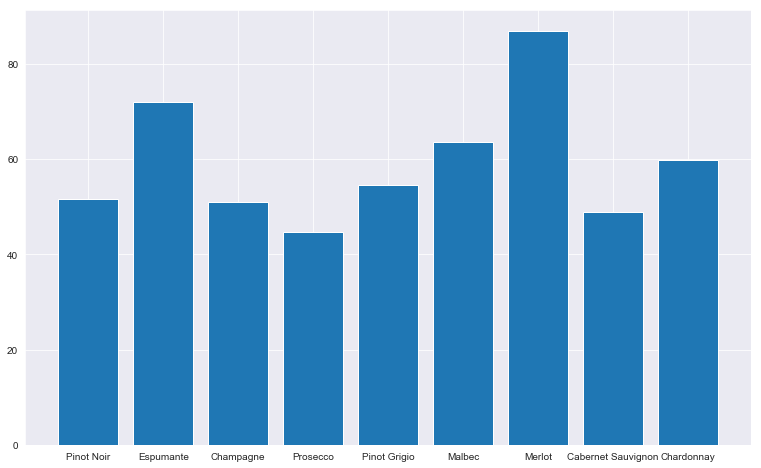

In [23]:
sns.set_style('darkgrid')

plt.figure(figsize=(13,8))

plt.bar(wine_df_join.Varietal.unique(),
        wine_df_join.groupby('Varietal')['Discount'].mean())

plt.show()

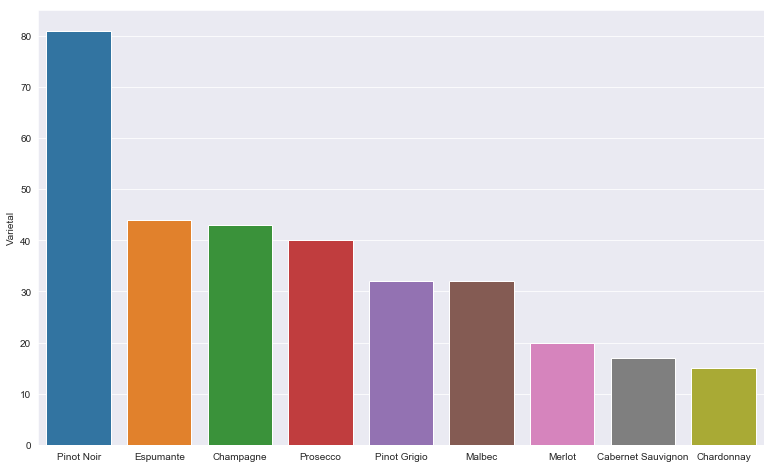

In [24]:
plt.figure(figsize=(13,8))

sns.barplot(wine_df_join.Varietal.unique(),
           wine_df.Varietal.value_counts())

plt.show()

## Scatter Plot

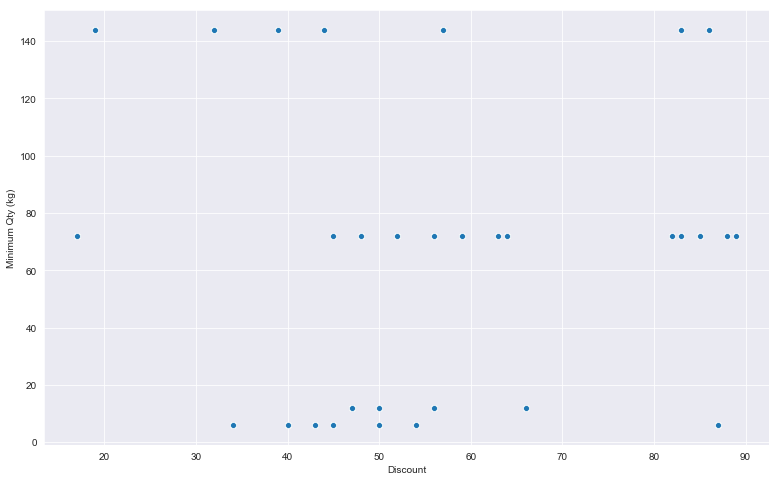

In [25]:
plt.figure(figsize=(13,8))
sns.scatterplot(data_num.Discount,
               data_num['Minimum Qty (kg)'])
plt.show()

# Histograms


C:\Users\psargsyan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


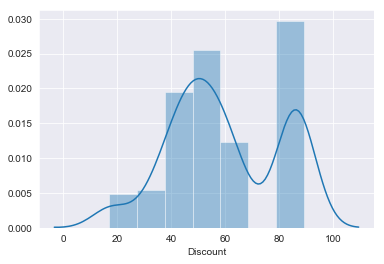

In [26]:
sns.distplot(data_num.Discount)
plt.show()

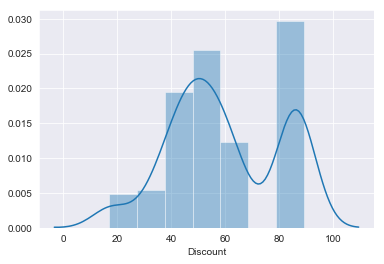

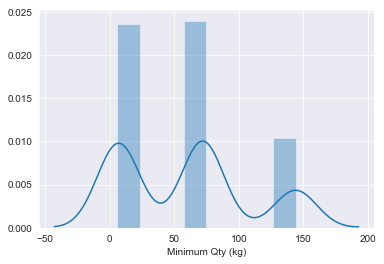

In [27]:
for i in data_num.columns:
    sns.distplot(data_num[i])
    plt.show()

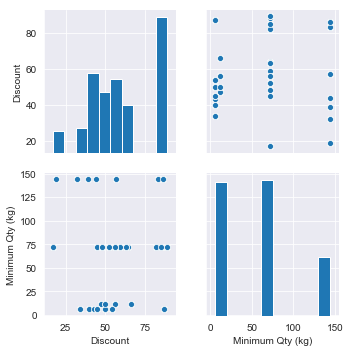

In [28]:
sns.pairplot(data_num)
plt.show()

## Boxplot

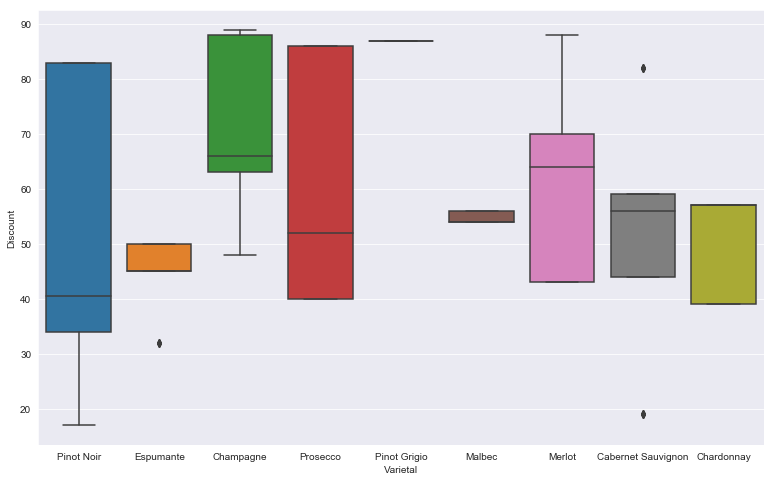

In [29]:
plt.figure(figsize=(13,8))
sns.boxplot(y=wine_df_join.Discount,x=wine_df_join.Varietal)
plt.show()

# Statistical Test

In [30]:
#correlation table
data_num.corr()

,Discount,Minimum Qty (kg)
Discount,1.000000,0.208962
Minimum Qty (kg),0.208962,1.000000


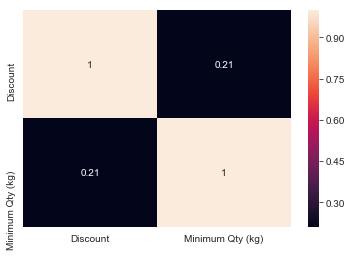

In [31]:
#heatmap
sns.heatmap(data_num.corr(),annot=True)
plt.show()

## pearsonr: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html

In [32]:
#correlation test
pearsonr(data_num.Discount,data_num['Minimum Qty (kg)'])

(0.20896189931265605, 0.00015144638556188587)

> First value in the output above shows corr coeff and second value is for p-value. In the example above, since p<0.05 therefore correlation between Discount and Minimum Qty is statistically significant.

In [33]:
#creating pivot table
pd.pivot_table(data=wine_df_join,columns='Gender',values=['Minimum Qty (kg)','Discount'],aggfunc='mean')

Gender,Female,Male
Discount,59.876543,59.08642
Minimum Qty (kg),59.185185,57.62963


In [34]:
wine_df['Discount'][wine_df['Gender']=='Female'].head()

24    17
25    83
37    56
38    48
39    57
Name: Discount, dtype: int64

# Independent sample T-test

From T-test documentation: **This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.**

In [35]:
ttest_ind(wine_df['Discount'][wine_df['Gender']=='Female'], #Discount for Female customers
          wine_df['Discount'][wine_df['Gender']=='Male'],  #Discount for Male customers
          equal_var=True #Defining whether variances are equal or not
)

Ttest_indResult(statistic=0.3493449018773563, pvalue=0.7270587420532792)

> **The results above show that average Discount is statistically significantly different between male and female customers.**

In [36]:
for i in data_num.columns:
    print(i, '----', ttest_ind(wine_df[i][wine_df['Gender']=='Female'],
          wine_df[i][wine_df['Gender']=='Male']))

Discount ---- Ttest_indResult(statistic=0.3493449018773563, pvalue=0.7270587420532792)
Minimum Qty (kg) ---- Ttest_indResult(statistic=0.2810538816316087, pvalue=0.7788495822610434)


> Levene's test should be used to check whether the variances between two sample are equal or not. The Levene test tests the **null hypothesis that all input samples are from populations with equal variances.**

In [37]:
levene(wine_df['Discount'][wine_df['Gender']=='Female'],
          wine_df['Discount'][wine_df['Gender']=='Male'])

LeveneResult(statistic=0.8097998601665954, pvalue=0.3688519181536686)

> **The result above indicates that we can accept null hypotheses, therefore there is NO stat significant difference between variances of discount for male and female customers.**

## One-Way ANOVA

**From One-Way ANOVA Scipy Documentation: The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.**

In [38]:
f_oneway(wine_df['Minimum Qty (kg)'][wine_df['discount_name']=='Up to 30'],
        wine_df['Minimum Qty (kg)'][wine_df['discount_name']=='[30,60]'],
        wine_df['Minimum Qty (kg)'][wine_df['discount_name']=='More than 60']
        )

F_onewayResult(statistic=28.03200050009234, pvalue=6.0178135475001005e-12)

> **The results above indicate that average min quantity is stat significantly different between discount ranges.**

In [39]:
levene(wine_df['Minimum Qty (kg)'][wine_df['discount_name']=='Up to 30'],
        wine_df['Minimum Qty (kg)'][wine_df['discount_name']=='[30,60]'],
        wine_df['Minimum Qty (kg)'][wine_df['discount_name']=='More than 60'])

LeveneResult(statistic=2.1276213771479866, pvalue=0.12079713843119513)

> **Levene's test results show that p is more than 0.05, therefore there is NO stat significant difference between variances of Minimum quantity by discount ranges.**

In [40]:
for i in data_num.columns:
    print(i,'-',levene(wine_df[i][wine_df['discount_name']=='Up to 30'],
        wine_df[i][wine_df['discount_name']=='[30,60]'],
        wine_df[i][wine_df['discount_name']=='More than 60']))

Discount - LeveneResult(statistic=7.595661157511225, pvalue=0.0005983076494783423)
Minimum Qty (kg) - LeveneResult(statistic=2.1276213771479866, pvalue=0.12079713843119513)


In [41]:
for i in data_num.columns:
    print(i,' ',f_oneway(wine_df[i][wine_df['discount_name']=='Up to 30'],
        wine_df[i][wine_df['discount_name']=='[30,60]'],
        wine_df[i][wine_df['discount_name']=='More than 60']
        ))

Discount   F_onewayResult(statistic=777.0575589541559, pvalue=9.398836351724517e-124)
Minimum Qty (kg)   F_onewayResult(statistic=28.03200050009234, pvalue=6.0178135475001005e-12)
